In [ ]:
#reading the images to be used for training
import sys
import cv2 as cv
import numpy as np
import os
import glob

def mainFunction():
    directory = '/content/drive/MyDrive/Unlabelled'
    os.chdir(directory)

    for imgname in glob.glob("*.jpg"):
        print(imgname)
        # Read your image here
        src = cv.imread(imgname)

        # Check if image is loaded fine
        if src is None:
            print ('Error opening image!')
            print ('Usage: hough_circle.py [image_name -- default ' + imgname + '] \n')
            return -1

        # Process your image here

        # Save your image here
        directory = '/content/drive/MyDrive/All images/Sickle celled images'
        os.chdir(directory)
        filename = str(imgname)
        cv.imwrite(filename, src)

        # Change the directory to the data folder, before read the next image
        directory = '/content/drive/MyDrive/Unlabelled'
        os.chdir(directory)

if __name__ == "__main__":
    mainFunction()

10.jpg
101.jpg
100.jpg
1.jpg
105.jpg
107.jpg
103.jpg
102.jpg
106.jpg
104.jpg
108.jpg
113.jpg
111.jpg
109.jpg
114.jpg
112.jpg
110.jpg
11.jpg
115.jpg
121.jpg
116.jpg
120.jpg
12.jpg
118.jpg
119.jpg
117.jpg
124.jpg
122.jpg
123.jpg
125.jpg
126.jpg
129.jpg
130.jpg
13.jpg
128.jpg
127.jpg
133.jpg
132.jpg
131.jpg
134.jpg
136.jpg
135.jpg
140.jpg
137.jpg
138.jpg
139.jpg
14.jpg
144.jpg
142.jpg
141.jpg
143.jpg
145.jpg
148.jpg
146.jpg
149.jpg
147.jpg
15.jpg
151.jpg
154.jpg
153.jpg
150.jpg
152.jpg
157.jpg
155.jpg
159.jpg
156.jpg
158.jpg
16.jpg
160.jpg
163.jpg
161.jpg
162.jpg
164.jpg
167.jpg
165.jpg
166.jpg
17.jpg
170.jpg
168.jpg
169.jpg
172.jpg
174.jpg
171.jpg
173.jpg
176.jpg
177.jpg
175.jpg
178.jpg
18.jpg
180.jpg
179.jpg
182.jpg
181.jpg
183.jpg
184.jpg
188.jpg
187.jpg
185.jpg
186.jpg
19.jpg
189.jpg
191.jpg
190.jpg
194.jpg
193.jpg
192.jpg
197.jpg
196.jpg
195.jpg
2.jpg
199.jpg
198.jpg
20.jpg
201.jpg
200.jpg
204.jpg
203.jpg
205.jpg
202.jpg
208.jpg
207.jpg
206.jpg
21.jpg
210.jpg
209.jpg
211.jpg
213.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading images to be used for testing
import sys
import cv2 as cv
import numpy as np
import os
import glob

def mainFunction():
    directory = '/content/drive/MyDrive/Clear'
    os.chdir(directory)

    for imgname in glob.glob("*.jpg"):
        print(imgname)
        # Read your image here
        src = cv.imread(imgname)

        # Check if image is loaded fine
        if src is None:
            print ('Error opening image!')
            print ('Usage: hough_circle.py [image_name -- default ' + imgname + '] \n')
            return -1

        # Process your image here

        # Save your image here
        directory = '/content/drive/MyDrive/All images/Normal images'
        os.chdir(directory)
        filename = str(imgname)
        cv.imwrite(filename, src)

        # Change the directory to the data folder, before read the next image
        directory = '/content/drive/MyDrive/Clear'
        os.chdir(directory)

if __name__ == "__main__":
    mainFunction()

105.jpg
1.jpg
103.jpg
104.jpg
10.jpg
101.jpg
106.jpg
100.jpg
102.jpg
108.jpg
113.jpg
112.jpg
110.jpg
107.jpg
111.jpg
11.jpg
109.jpg
116.jpg
121.jpg
117.jpg
120.jpg
12.jpg
115.jpg
118.jpg
114.jpg
119.jpg
126.jpg
125.jpg
123.jpg
122.jpg
127.jpg
124.jpg
132.jpg
130.jpg
128.jpg
13.jpg
131.jpg
133.jpg
129.jpg
134.jpg
139.jpg
136.jpg
138.jpg
137.jpg
14.jpg
135.jpg
140.jpg
144.jpg
142.jpg
141.jpg
143.jpg
15.jpg
17.jpg
147.jpg
146.jpg
145.jpg
16.jpg
19.jpg
2.jpg
18.jpg
22.jpg
21.jpg
20.jpg
23.jpg
24.jpg
26.jpg
25.jpg
28.jpg
27.jpg
30.jpg
3.jpg
29.jpg
32.jpg
31.jpg
33.jpg
34.jpg
37.jpg
39.jpg
36.jpg
35.jpg
38.jpg
4.jpg
40.jpg
42.jpg
41.jpg
45.jpg
46.jpg
47.jpg
44.jpg
43.jpg
49.jpg
5.jpg
48.jpg
53.jpg
51.jpg
52.jpg
50.jpg
54.jpg
57.jpg
56.jpg
58.jpg
55.jpg
59.jpg
60.jpg
6.jpg
61.jpg
65.jpg
62.jpg
64.jpg
63.jpg
7.jpg
66.jpg
69.jpg
68.jpg
67.jpg
73.jpg
71.jpg
70.jpg
72.jpg
75.jpg
76.jpg
77.jpg
74.jpg
78.jpg
8.jpg
79.jpg
81.jpg
82.jpg
83.jpg
80.jpg
87.jpg
84.jpg
86.jpg
85.jpg
9.jpg
90.jpg
89.jpg
88

In [ ]:
#loading the data
import os
import pandas as pd

root_dir = '/content/drive/MyDrive/All images'
sub_folders = ["Sickle celled images", "Normal images"]
labels = [0, 1]

data = []

for s, l in zip(sub_folders, labels):
    for r, d, f in os.walk(os.path.join(root_dir, s)):
        for file in f:
            if ".jpg" in file:
                data.append((os.path.join(s, file), l))

df = pd.DataFrame(data, columns=['file_name', 'label'])


In [ ]:
#having a look of how the dataset looks like
print(df.head())


                      file_name  label
0    Sickle celled images/1.jpg      0
1   Sickle celled images/10.jpg      0
2  Sickle celled images/102.jpg      0
3  Sickle celled images/104.jpg      0
4  Sickle celled images/107.jpg      0


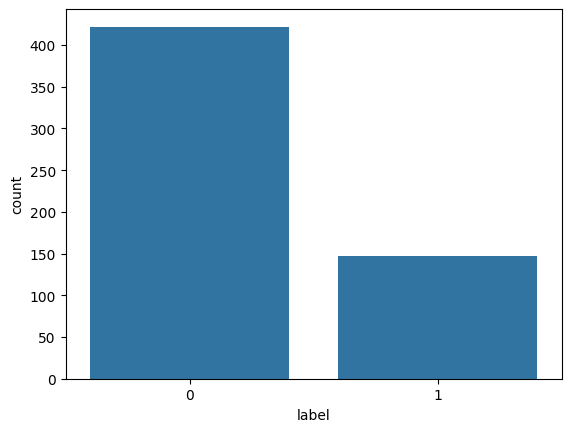

In [ ]:
#plotting the class distribution for image classification with 0 for sickle and 1 for normal
import seaborn as sns
sns.countplot(data = df, x = 'label');

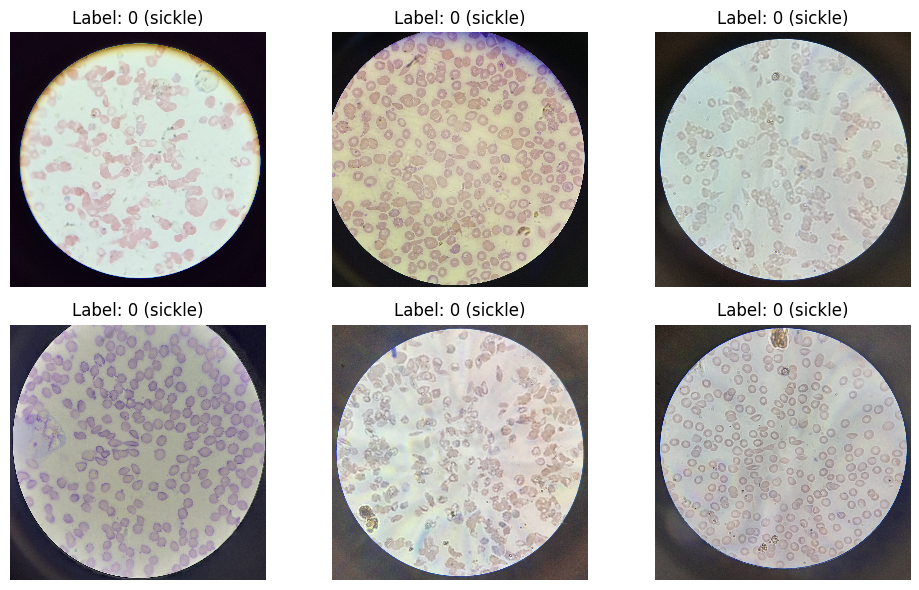

In [ ]:
#importing some of the libraries to be used
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import cv2

import albumentations as A
from albumentations.pytorch import ToTensorV2

import numpy as np # data processing
import matplotlib.pyplot as plt # Data visualization
from tqdm import tqdm # Progress bar

#plotting some of the samples to get a feeling of the dataset
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

idx = 0
for i in range(2):
    for j in range(3):

        label = df.label[idx]
        file_path = os.path.join(root_dir, df.file_name[idx])

        # Read an image with OpenCV
        image = cv2.imread(file_path)

        # Convert the image to RGB color space.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize image
        image = cv2.resize(image, (256, 256))

        ax[i,j].imshow(image)
        ax[i,j].set_title(f"Label: {label} ({'normal' if label == 1 else 'sickle'})")
        ax[i,j].axis('off')
        idx = idx+1

plt.tight_layout()
plt.show()

In [ ]:
# Necessary libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.models as models

# Define root directory and sub-folders
root_dir = '/content/drive/MyDrive/All images'
sub_folders = ["Sickle celled images", "Normal images"]
labels = [0, 1]

# Empty list to store data
data = []

# Iterate through sub-folders to collect file paths and labels
for s, l in zip(sub_folders, labels):
    for r, d, f in os.walk(os.path.join(root_dir, s)):
        for file in f:
            if ".jpg" in file:
                data.append((os.path.join(s, file), l))

# Create DataFrame
df = pd.DataFrame(data, columns=['file_name', 'label'])

# Split the dataset into training (70%), validation (15%), and testing (15%) sets
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print the size of each set
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Testing set size:", len(test_df))


Training set size: 398
Validation set size: 85
Testing set size: 86


In [ ]:
#building the baseline ie data pipeline for loading images, model with loss and optimizer, training the pipeline
#we need to make the code as modular as possible and work with a configuration for tuning
from types import SimpleNamespace

cfg = SimpleNamespace(**{})

In [ ]:
# Define the CNN model architecture
class SickleCellCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SickleCellCNN, self).__init__()
        # Define the layers of your CNN model
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x



In [ ]:
# Create an instance of the model
model = SickleCellCNN()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print loss function details
print("Loss Function Details:")
print(criterion)

# Print optimizer details
print("\nOptimizer Details:")
print(optimizer)


Loss Function Details:
CrossEntropyLoss()

Optimizer Details:
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [ ]:
from PIL import Image
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.dataframe.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.dataframe.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define the root directory and other parameters
root_dir = '/content/drive/MyDrive/All images'
sub_folders = ["Sickle celled images", "Normal images"]
labels = [0, 1]

# Load data into a DataFrame
data = []
for s, l in zip(sub_folders, labels):
    for r, d, f in os.walk(os.path.join(root_dir, s)):
        for file in f:
            if ".jpg" in file:
                data.append((os.path.join(s, file), l))

df = pd.DataFrame(data, columns=['file_name', 'label'])

# Now, let's create an instance of the CustomDataset class and use it
custom_dataset = CustomDataset(df, root_dir)

# Now, let's print some information about the dataset
print("Length of dataset:", len(custom_dataset))
print("First item in dataset:", custom_dataset[0])


Length of dataset: 569
First item in dataset: (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2775x2853 at 0x7B43FF172EC0>, 0)


In [ ]:
import torchvision.transforms as transforms

# Define transformations for data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Print details of the transformations
print("Train Transformations:")
for idx, transform in enumerate(train_transform.transforms):
    print(f"Transform {idx+1}: {transform}")


Train Transformations:
Transform 1: RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
Transform 2: RandomHorizontalFlip(p=0.5)
Transform 3: ToTensor()
Transform 4: Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


In [ ]:
import os
import cv2
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.data = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        label = self.data.iloc[idx, 1]

        # Add error handling for image loading
        try:
            image = cv2.imread(img_name)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)  # Convert NumPy array to PIL image
        except Exception as e:
            print(f"Error loading image: {img_name}")
            print(e)
            return None, None  # Return None if image loading fails

        # Apply transformations if available
        if self.transform:
            try:
                image = self.transform(image)
            except Exception as e:
                print(f"Error applying transformation to image: {img_name}")
                print(e)
                return None, None  # Return None if transformation fails

        return image, label

# Define the root directory for the datasets
root_dir = '/content/drive/MyDrive/All images'

# Load data into a DataFrame
data = []
sub_folders = ["Sickle celled images", "Normal images"]
labels = [0, 1]
for s, l in zip(sub_folders, labels):
    for r, d, f in os.walk(os.path.join(root_dir, s)):
        for file in f:
            if ".jpg" in file:
                data.append((os.path.join(s, file), l))

df = pd.DataFrame(data, columns=['file_name', 'label'])

# Define your transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets with root_dir parameter
train_dataset = CustomDataset(df, root_dir=root_dir, transform=train_transform)

# Filter out None entries from dataset
train_dataset = [(image, label) for image, label in train_dataset if image is not None]

# Create DataLoader object
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [ ]:
# Create datasets for validation and testing with root_dir parameter and transformations
val_dataset = CustomDataset(val_df, root_dir=root_dir, transform=train_transform)
test_dataset = CustomDataset(test_df, root_dir=root_dir, transform=train_transform)

# Filter out None entries from datasets
val_dataset = [(image, label) for image, label in val_dataset if image is not None]
test_dataset = [(image, label) for image, label in test_dataset if image is not None]

# Create DataLoader objects for validation and testing datasets
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [ ]:
# Iterate over the DataLoader and print some information about the first batch
for images, labels in train_loader:
    print("Batch size:", images.size(0))
    print("First image shape:", images[0].shape)
    print("First label:", labels[0])
    break  # Exit loop after processing the first batch


Batch size: 64
First image shape: torch.Size([3, 224, 224])
First label: tensor(1)


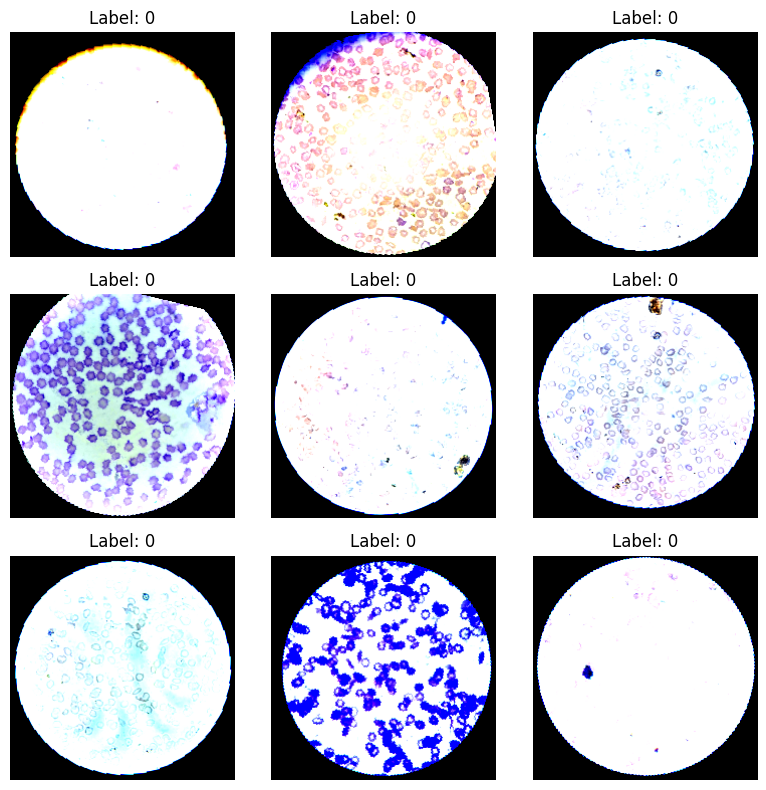

In [ ]:
import matplotlib.pyplot as plt

# Plot some sample images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, (image, label) in enumerate(train_dataset[:9]):
    ax = axes[i // 3, i % 3]
    ax.imshow(image.permute(1, 2, 0))  # Convert tensor back to PIL image format
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.tight_layout()
plt.show()


Epoch [1/200], Loss: 6.323391643389995e-06, Accuracy: 1.0
Epoch [2/200], Loss: 1.0348988818501917e-05, Accuracy: 1.0
Epoch [3/200], Loss: 1.5070598743073384e-05, Accuracy: 1.0
Epoch [4/200], Loss: 7.491894444279347e-06, Accuracy: 1.0
Epoch [5/200], Loss: 7.446048761671085e-06, Accuracy: 1.0
Epoch [6/200], Loss: 6.691935532722306e-06, Accuracy: 1.0
Epoch [7/200], Loss: 7.3845035078395286e-06, Accuracy: 1.0
Epoch [8/200], Loss: 1.025781873270009e-05, Accuracy: 1.0
Epoch [9/200], Loss: 1.2222383955102285e-05, Accuracy: 1.0
Epoch [10/200], Loss: 7.499872026528465e-06, Accuracy: 1.0
Epoch [11/200], Loss: 7.972441886118355e-06, Accuracy: 1.0
Epoch [12/200], Loss: 1.2896221966861453e-05, Accuracy: 1.0
Epoch [13/200], Loss: 1.607048511687026e-05, Accuracy: 1.0
Epoch [14/200], Loss: 7.665297213558612e-06, Accuracy: 1.0
Epoch [15/200], Loss: 2.205400901150117e-05, Accuracy: 1.0
Epoch [16/200], Loss: 1.1632464823681707e-05, Accuracy: 1.0
Epoch [17/200], Loss: 1.3271554128853799e-05, Accuracy: 1.0

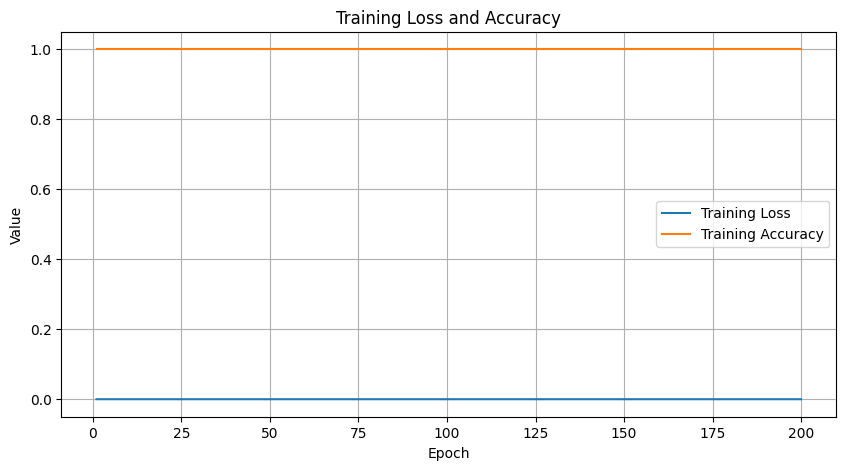

In [ ]:
#training the model
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 200
train_loss_values = []  # List to store training loss values for each epoch
train_accuracy_values = []  # List to store training accuracy values for each epoch

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move tensors to the GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        # Ensure labels are within the expected range
        labels = labels.clamp(0, 1)  # Assuming binary classification, adjust range accordingly
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")

    # Append loss and accuracy values to lists for plotting
    train_loss_values.append(epoch_loss)
    train_accuracy_values.append(epoch_accuracy)

# Plotting the training loss and accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, num_epochs + 1), train_accuracy_values, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import torch
torch.save(model,'/content/drive/MyDrive/mymodel.pth')

In [ ]:
import torch

# Load the model
model = torch.load('/content/drive/MyDrive/mymodel.pth')

# Ensure the model is in evaluation mode
model.eval()


SickleCellCNN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inpla

Epoch [1/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [2/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [3/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [4/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [5/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [6/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [7/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [8/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [9/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [10/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [11/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [12/100], Val Loss: 0.6945629905251895, Val Accuracy: 0.6823529411764706
Epoch [13/100], Val Loss: 0.6945629905251895, Val Accuracy: 0

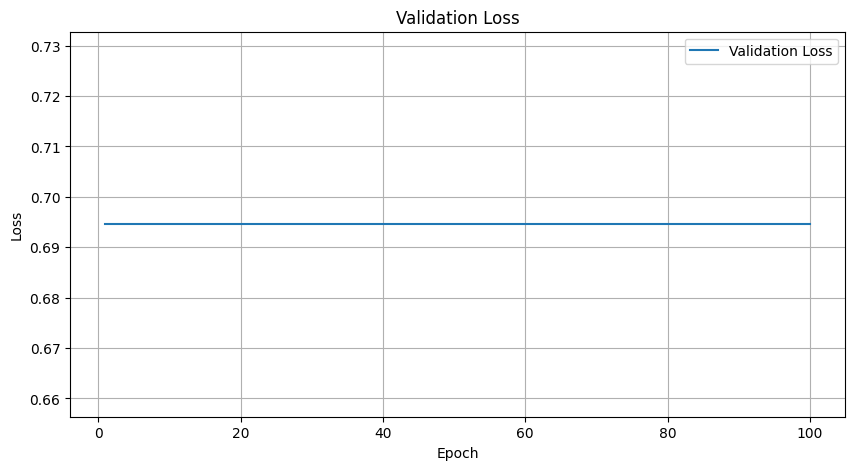

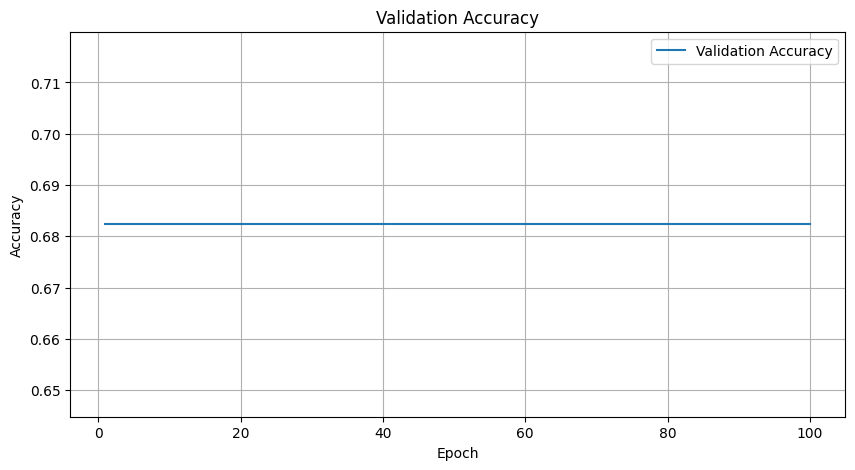

In [ ]:
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 100
val_loss_values = []  # List to store validation loss values for each epoch
val_accuracy_values = []  # List to store validation accuracy values for each epoch

for epoch in range(num_epochs):
    # Validation phase
    model.eval()
    running_val_loss = 0.0
    correct_predictions_val = 0
    total_predictions_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move tensors to the GPU
            outputs = model(inputs)
            # Invert labels since 0 corresponds to positive and 1 corresponds to negative
            labels = 1 - labels
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            # Invert predictions as well
            predicted = 1 - predicted
            total_predictions_val += labels.size(0)
            correct_predictions_val += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_loader)
    epoch_val_accuracy = correct_predictions_val / total_predictions_val

    print(f"Epoch [{epoch+1}/{num_epochs}], Val Loss: {epoch_val_loss}, Val Accuracy: {epoch_val_accuracy}")

    # Append validation loss and accuracy values to lists for plotting
    val_loss_values.append(epoch_val_loss)
    val_accuracy_values.append(epoch_val_accuracy)

# Plotting the validation loss and accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch [1/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [2/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [3/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [4/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [5/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [6/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [7/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [8/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [9/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [10/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [11/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [12/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [13/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [14/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [15/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
Epoch [16/100], Val Loss: 43.42747817730559, Val Accuracy: 0.8
E

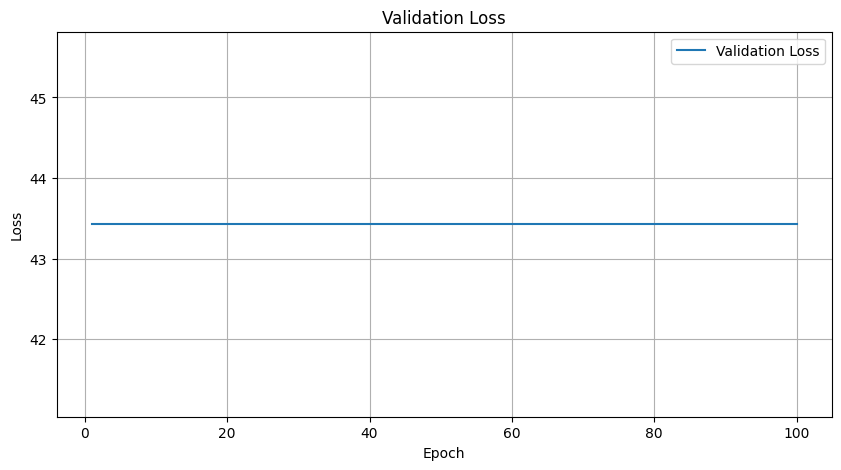

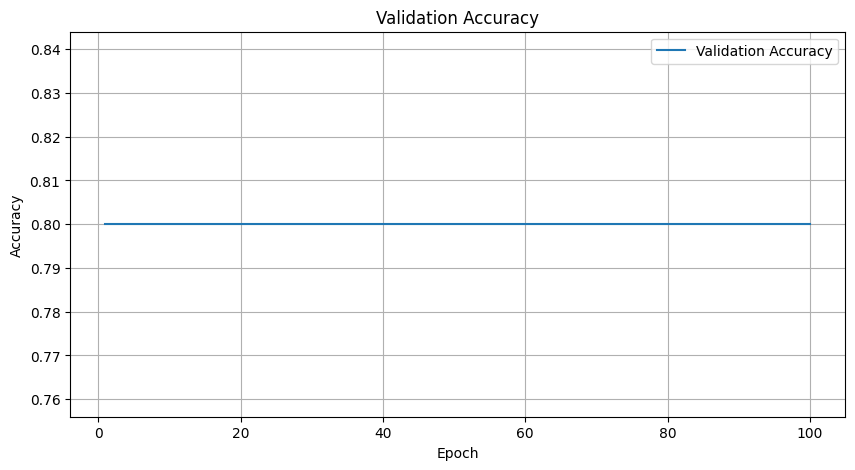

In [ ]:
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 100
val_loss_values = []  # List to store validation loss values for each epoch
val_accuracy_values = []  # List to store validation accuracy values for each epoch

for epoch in range(num_epochs):
    # Validation phase
    model.eval()
    running_val_loss = 0.0
    correct_predictions_val = 0
    total_predictions_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move tensors to the GPU
            outputs = model(inputs)
            # Invert labels since 0 corresponds to positive and 1 corresponds to negative
            labels = 1 - labels
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            # Invert predictions as well
            predicted = 1 - predicted
            total_predictions_val += labels.size(0)
            correct_predictions_val += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_loader)
    epoch_val_accuracy = correct_predictions_val / total_predictions_val

    print(f"Epoch [{epoch+1}/{num_epochs}], Val Loss: {epoch_val_loss}, Val Accuracy: {epoch_val_accuracy}")

    # Append validation loss and accuracy values to lists for plotting
    val_loss_values.append(epoch_val_loss)
    val_accuracy_values.append(epoch_val_accuracy)

# Plotting the validation loss and accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch [1/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [2/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [3/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [4/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [5/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [6/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [7/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [8/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [9/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [10/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [11/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [12/50], Test Loss: 46.53685284616267, Test Accuracy: 0.8023255813953488
Epoch [13/50], Test Loss: 46.53685284616267, Test Accuracy: 0

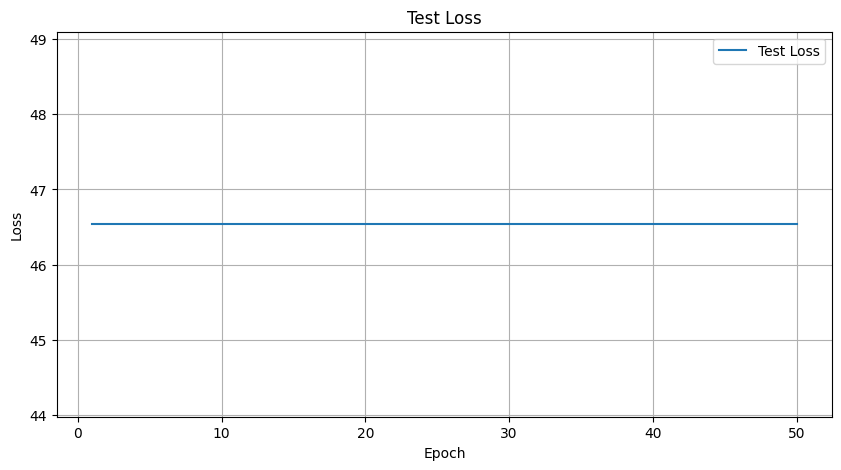

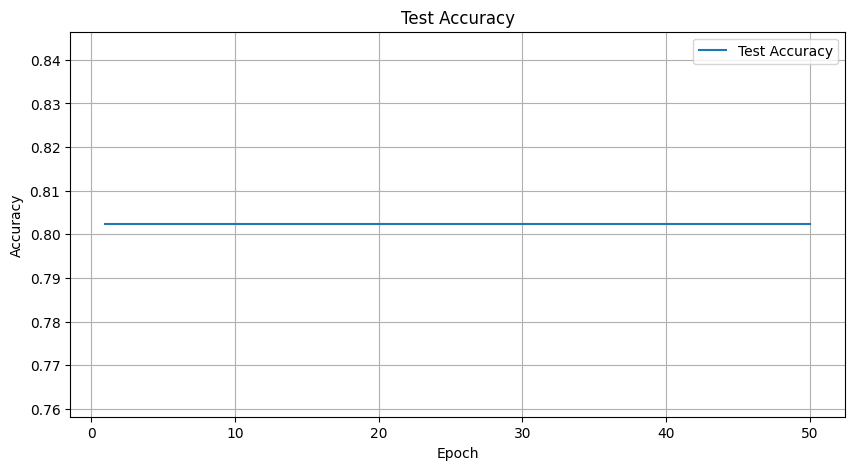

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 50
test_loss_values = []  # List to store test loss values for each epoch
test_accuracy_values = []  # List to store test accuracy values for each epoch

for epoch in range(num_epochs):
    # Testing phase
    model.eval()
    running_test_loss = 0.0
    correct_predictions_test = 0
    total_predictions_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move tensors to the GPU
            outputs = model(inputs)
            # Invert labels since 0 corresponds to positive and 1 corresponds to negative
            labels = 1 - labels
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            # Invert predictions as well
            predicted = 1 - predicted
            total_predictions_test += labels.size(0)
            correct_predictions_test += (predicted == labels).sum().item()

    epoch_test_loss = running_test_loss / len(test_loader)
    epoch_test_accuracy = correct_predictions_test / total_predictions_test

    print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {epoch_test_loss}, Test Accuracy: {epoch_test_accuracy}")

    # Append test loss and accuracy values to lists for plotting
    test_loss_values.append(epoch_test_loss)
    test_accuracy_values.append(epoch_test_accuracy)

# Plotting the test loss and accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), test_loss_values, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Classification report and confusion matrix
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Convert the lists to numpy array


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87        66
           1       0.56      0.70      0.62        20

    accuracy                           0.80        86
   macro avg       0.73      0.77      0.74        86
weighted avg       0.82      0.80      0.81        86



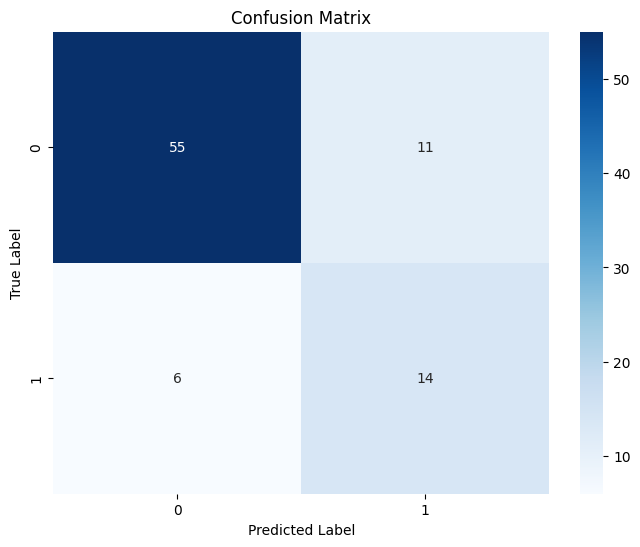

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Disable gradient tracking during evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        true_labels.extend(labels.cpu().numpy())  # Convert tensor to numpy array and extend the list
        predicted_labels.extend(predicted.cpu().numpy())  # Convert tensor to numpy array and extend the list

# Generate classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels ('linear', 'rbf', 'poly', etc.)

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Train the SVM model
X_train_flattened = []  # List to store flattened training images
y_train_list = []  # List to store training labels
with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)  # Move data to the appropriate device
        labels = labels.to(device)

        # Flatten the images to use as features
        features = images.view(images.size(0), -1).cpu().numpy()  # Convert tensor to numpy array
        X_train_flattened.append(features)
        y_train_list.append(labels.cpu().numpy())

# Flatten the lists
X_train_flattened = np.concatenate(X_train_flattened, axis=0)
y_train = np.concatenate(y_train_list, axis=0)

# Train the SVM model
svm_classifier.fit(X_train_flattened, y_train)

# Disable gradient tracking during evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)  # Move data to the appropriate device

        # Flatten the images to use as features
        features = images.view(images.size(0), -1).cpu().numpy()  # Convert tensor to numpy array

        # Make predictions using SVM classifier
        predictions = svm_classifier.predict(features)

        true_labels.extend(labels.cpu().numpy())  # Convert tensor to numpy array and extend the list
        predicted_labels.extend(predictions)  # Extend the list with predictions

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8488372093023255
Precision: 0.6842105263157895
Recall: 0.65
F1-score: 0.6666666666666667


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Define a function to predict the class of an image
def predict_image(image_path, model):
    # Load and preprocess the image
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize image to fit model input size
        transforms.ToTensor(),  # Convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
    ])
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

    # Move the input tensor to the same device as the model
    device = next(model.parameters()).device
    image_tensor = image_tensor.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Make prediction
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)

    # Convert predicted class index to label
    if predicted.item() == 0:
        return "Positive"
    elif predicted.item() == 1:
        return "Negative"

# Example usage:
# Assuming `model` is your trained model
image_path = "/content/drive/MyDrive/All images/Sickle celled images/1.jpg"
prediction = predict_image(image_path, model)
print("Prediction:", prediction)


Prediction: Positive
